<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Análisis de Componentes Principales: PCA</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<font color=red size=4>**Utilizaremos el Modulo *sklearn* que es muy utilizado en modelamiento y machine learning**

In [71]:
#Cargamos las librerias que vamos a requeririr para hacer el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pybaselines import Baseline, utils
from sklearn.preprocessing import normalize

**<font size=4 color=green>El análisis de componentes principales (PCA) es una transformación lineal que reduce la dimensionalidad y busca la dirección en los datos con la mayor varianza. Debido a la naturaleza del método, es sensible a variables con diferentes rangos de valores y, por lo tanto, también a valores atípicos. Una ventaja es que permite visualizar los datos en un diagrama de dispersión bidimensional o tridimensional, lo que facilita la confirmación visual de los valores atípicos detectados. Además, proporciona una buena interpretabilidad de las variables de respuesta. Otra gran ventaja del PCA es que se puede combinar con otros métodos, como diferentes métricas de distancia, para mejorar la precisión de la detección de valores atípicos.**

**<font size=3 color=blue>Vamos a utilizar los datos extraídos de un artículo titulado ["Label-Free Identification of Exosomes using Raman Spectroscopy and Machine Learning"](https://doi.org/10.1002/smll.202205519).**

In [72]:
data = pd.read_csv('./Datos/raw_data.csv')
data

,labels,670,671,672,673,674,675,676,677,678,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,Hec,2013.9,2013.0,2012.0,2012.4,2013.3,2014.2,2014.0,2012.6,2011.2,...,1815.2,1815.5,1815.2,1815.2,1816.4,1817.6,1817.8,1817.5,1817.3,1817.3
1,Hec,1955.2,1955.1,1955.0,1954.3,1953.4,1952.5,1951.7,1951.0,1950.3,...,1806.2,1808.0,1809.5,1810.9,1811.9,1812.9,1812.8,1812.0,1810.9,1808.0
2,Hec,1924.2,1922.8,1921.4,1920.6,1920.1,1919.6,1919.4,1919.6,1919.8,...,1805.9,1805.0,1804.1,1803.3,1803.0,1802.8,1802.5,1802.2,1801.9,1801.0
3,Hec,1946.3,1945.4,1944.5,1944.6,1945.1,1945.5,1944.9,1943.4,1941.9,...,1813.3,1812.7,1811.9,1811.0,1809.4,1807.8,1807.6,1808.0,1808.0,1806.4
4,Hec,1909.0,1909.0,1909.0,1909.2,1909.4,1909.6,1908.8,1907.1,1905.4,...,1797.1,1796.9,1796.4,1795.8,1794.9,1794.0,1794.0,1794.4,1794.8,1795.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,NaN,1849.7,1850.9,1852.2,1853.2,1854.2,1855.3,1854.3,1853.2,1852.1,...,1706.1,1707.1,1708.0,1708.1,1707.9,1707.9,1709.5,1711.1,1710.9,1709.5
9463,NaN,1845.1,1845.7,1846.3,1846.1,1845.9,1845.7,1844.8,1843.9,1843.0,...,1704.7,1704.5,1704.4,1705.2,1706.5,1707.7,1707.5,1707.4,1707.5,1707.9
9464,NaN,1912.2,1913.0,1914.0,1915.8,1917.7,1919.6,1919.4,1919.1,1918.8,...,1705.1,1705.9,1706.7,1706.9,1706.8,1706.8,1707.6,1708.4,1708.7,1708.7
9465,NaN,1821.9,1821.8,1821.7,1822.2,1822.6,1823.0,1822.2,1821.3,1820.4,...,1702.8,1703.4,1704.0,1704.2,1704.1,1704.0,1703.5,1702.9,1702.2,1701.2


In [73]:
data1 = data.dropna() # Eliminamos las filas sin datos
wavenumbers = data1.columns[1:].astype(np.float64) # Extraemos las longitudes de onda de las columnas
data1

,labels,670,671,672,673,674,675,676,677,678,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,Hec,2013.9,2013.0,2012.0,2012.4,2013.3,2014.2,2014.0,2012.6,2011.2,...,1815.2,1815.5,1815.2,1815.2,1816.4,1817.6,1817.8,1817.5,1817.3,1817.3
1,Hec,1955.2,1955.1,1955.0,1954.3,1953.4,1952.5,1951.7,1951.0,1950.3,...,1806.2,1808.0,1809.5,1810.9,1811.9,1812.9,1812.8,1812.0,1810.9,1808.0
2,Hec,1924.2,1922.8,1921.4,1920.6,1920.1,1919.6,1919.4,1919.6,1919.8,...,1805.9,1805.0,1804.1,1803.3,1803.0,1802.8,1802.5,1802.2,1801.9,1801.0
3,Hec,1946.3,1945.4,1944.5,1944.6,1945.1,1945.5,1944.9,1943.4,1941.9,...,1813.3,1812.7,1811.9,1811.0,1809.4,1807.8,1807.6,1808.0,1808.0,1806.4
4,Hec,1909.0,1909.0,1909.0,1909.2,1909.4,1909.6,1908.8,1907.1,1905.4,...,1797.1,1796.9,1796.4,1795.8,1794.9,1794.0,1794.0,1794.4,1794.8,1795.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,Thp-1,1858.5,1859.7,1860.7,1860.5,1860.2,1860.0,1860.5,1861.0,1861.5,...,1714.8,1715.4,1716.0,1716.4,1716.6,1716.8,1717.8,1718.8,1719.1,1718.7
9423,Thp-1,1824.1,1825.2,1826.3,1825.8,1825.4,1825.0,1825.0,1825.0,1825.0,...,1699.4,1700.9,1702.4,1703.2,1703.4,1703.7,1704.0,1704.2,1703.7,1702.7
9424,Thp-1,1980.1,1979.7,1979.3,1979.3,1979.3,1979.3,1977.8,1976.2,1974.6,...,1724.0,1724.0,1724.0,1723.8,1723.6,1723.3,1723.3,1723.3,1723.6,1724.2
9425,Thp-1,1886.4,1887.1,1887.8,1888.5,1889.3,1890.0,1890.2,1890.4,1890.6,...,1711.2,1710.6,1709.9,1709.4,1709.0,1708.9,1710.3,1711.7,1712.4,1712.6


In [74]:
data1.iloc[:1, 1:]

,670,671,672,673,674,675,676,677,678,679,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,2013.9,2013.0,2012.0,2012.4,2013.3,2014.2,2014.0,2012.6,2011.2,2010.0,...,1815.2,1815.5,1815.2,1815.2,1816.4,1817.6,1817.8,1817.5,1817.3,1817.3


**<font size=4 color=green>Graficamos una fila.**

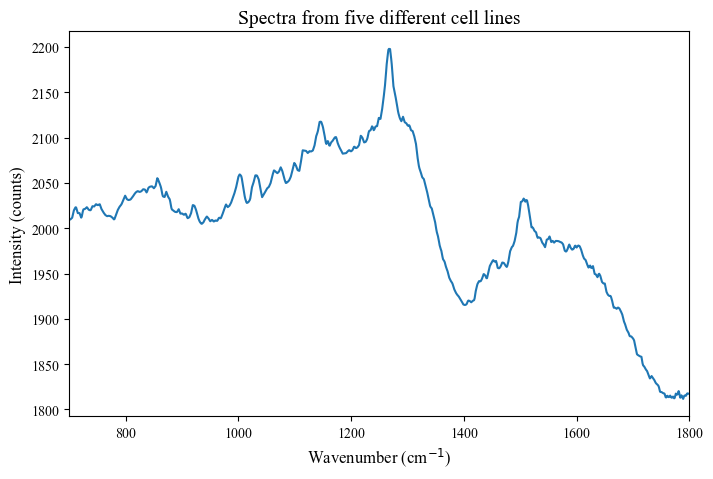

In [75]:
#data1.iloc[:1, 1:]
fig, ax = plt.subplots(figsize=(8,5))

# Plot the media spectra on the same axis
ax.plot(wavenumbers, data1.iloc[:1, 1:].T[0])


# Add axis labels and legend
ax.set_xlim(700, 1800)
ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
ax.set_ylabel('Intensity (counts)', fontsize=12)
ax.set_title('Spectra from five different cell lines', fontsize=14)
plt.show()

**<font size=4 color=green>Como se puede observar el espectro raman de las líneas celulares tienen un fondo muy alto, en estos casos es adecuado realizar una corrección de *línea base*.  Para realizar esta corrección existen varios modulos que incorporan esta función, uno de ellos es *scipy*, sin embargo, aquí utilizaremos un modulo exclusivo para esto, se denomina *pybaselines* y su función *Baseline*. Aquí mostramos su aplicación sobre un solo espectro**

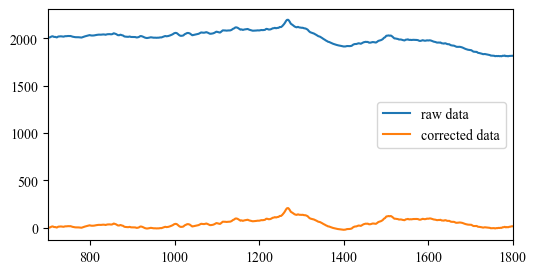

In [76]:
baseline_fitter = Baseline(x_data=wavenumbers)

bkg_21, params_21 = baseline_fitter.asls(data1.iloc[:1, 1:].T[0], lam=1e7, p=0.02)

#bkg_1, params_1 = baseline_fitter.modpoly(y1, poly_order=3)
#bkg_2, params_2 = baseline_fitter.asls(y1, lam=1e7, p=0.02)
#bkg_3, params_3 = baseline_fitter.mor(y1, half_window=30)
#bkg_4, params_4 = baseline_fitter.snip(y1, max_half_window=40, decreasing=True, smooth_half_window=3)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(wavenumbers, data1.iloc[:1, 1:].T[0], label='raw data', lw=1.5)
ax.plot(wavenumbers, data1.iloc[:1, 1:].T[0]-bkg_21, label='corrected data')
ax.set_xlim(700,1800)

plt.legend()
plt.show()

**<font size=4 color=green>Aquí utilizamos un loop con *for* para hacer la corrección de la linea base sobre todos los espectros. Note que adicionalmente se realizado la normalización de los espectros utilizando la función *normalize* de el modulo *sklearn*.**

In [77]:
data_x = data1.iloc[:, 1:].T
#data_x = data_x.drop(['labels'], axis=0)
bkg = []
data_x_cor = []
for k in range(len(data_x.columns)):
    baseline_fitter = Baseline(x_data=wavenumbers)
    bkg_21, params_21 = baseline_fitter.asls(data_x[k], lam=1e7, p=0.02)
    data_cor = data_x[k].values-bkg_21
    data_cor_n = normalize(data_cor.reshape(1,-1), norm='l2')
    data_cor_n = data_cor_n.ravel()
    bkg.append(bkg_21)
    data_x_cor.append(data_cor_n)

In [78]:
pd.DataFrame(data_x_cor)

,0,1,2,3,4,5,6,7,8,9,...,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130
0,0.001918,0.001493,0.001020,0.001205,0.001623,0.002042,0.001945,0.001285,0.000625,0.000059,...,0.004043,0.004392,0.004460,0.004668,0.005440,0.006211,0.006513,0.006581,0.006695,0.006904
1,0.007407,0.007351,0.007294,0.006904,0.006403,0.005901,0.005456,0.005066,0.004676,0.004119,...,0.002210,0.003417,0.004457,0.005442,0.006205,0.006967,0.007119,0.006882,0.006477,0.005073
2,0.006833,0.006007,0.005181,0.004709,0.004414,0.004118,0.004000,0.004117,0.004235,0.004352,...,0.005149,0.004818,0.004487,0.004215,0.004237,0.004319,0.004341,0.004364,0.004386,0.004055
3,0.005445,0.004930,0.004414,0.004477,0.004772,0.005008,0.004666,0.003803,0.002941,0.002194,...,0.006048,0.005908,0.005652,0.005338,0.004620,0.003901,0.003992,0.004431,0.004638,0.003920
4,0.005057,0.005055,0.005053,0.005166,0.005278,0.005391,0.004928,0.003947,0.002966,0.001985,...,0.005464,0.005537,0.005437,0.005280,0.004951,0.004621,0.004809,0.005228,0.005647,0.006123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,0.007311,0.008100,0.008752,0.008591,0.008362,0.008200,0.008514,0.008827,0.009141,0.008912,...,0.005596,0.006218,0.006840,0.007327,0.007677,0.008028,0.008921,0.009815,0.010233,0.010177
9423,0.007936,0.008752,0.009568,0.009164,0.008836,0.008508,0.008485,0.008462,0.008439,0.007730,...,0.001266,0.002624,0.003982,0.004807,0.005174,0.005617,0.006060,0.006427,0.006261,0.005713
9424,0.009374,0.009183,0.008992,0.008996,0.009000,0.009003,0.008279,0.007505,0.006731,0.006201,...,0.004079,0.004310,0.004541,0.004675,0.004809,0.004894,0.005126,0.005357,0.005733,0.006256
9425,0.006852,0.007280,0.007708,0.008135,0.008627,0.009055,0.009163,0.009271,0.009379,0.008591,...,0.001633,0.001468,0.001240,0.001139,0.001103,0.001258,0.002374,0.003489,0.004156,0.004504


**<font size=4 color=green>Vamos a realizar una inspección del resutado de la corrección graficando el espectro promedio.**

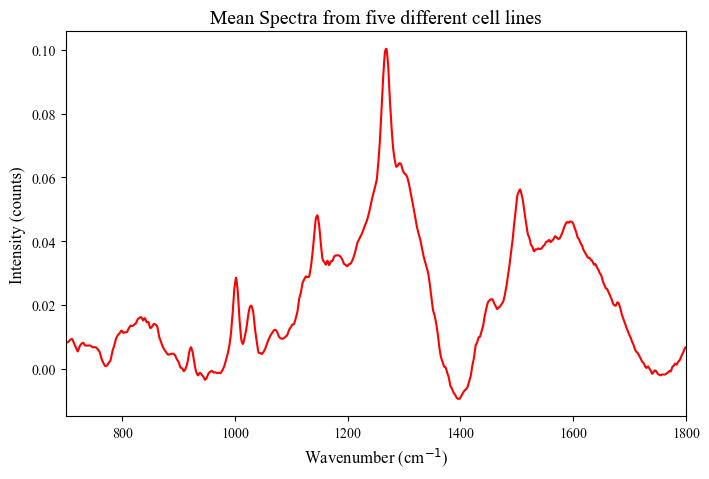

In [79]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot the media spectra on the same axis
ax.plot(wavenumbers, pd.DataFrame(data_x_cor).mean(axis=0), color='red')

# Add axis labels and legend
ax.set_xlim(700, 1800)
ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
ax.set_ylabel('Intensity (counts)', fontsize=12)
ax.set_title('Mean Spectra from five different cell lines', fontsize=14)
#ax.legend()

# Show the plot
plt.show()

**<font size=4 color=green>Ahora realizaremos el *Análisis por Componentes Principales* utilizando los datos corregidos y normalizados, recordar que las variables (en este caso longitudes de onda) deben estar en la columnas y las muestras en las filas. Utilizamos la función *PCA* de el modulo *sklearn*.  Adicionalmente, el resultado lo ponemos en dataframe y le agregamos una clumna con las etiquetas de las líneas celulares**

In [80]:
# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca = PCA(n_components=9) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
#pca1=pca.fit(pd.DataFrame(data_x_cor)) # obtener los componentes principales
datos_pca = pca.fit_transform(data_x_cor) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores
datos_pca1 = pd.DataFrame(data=datos_pca, columns=[f"PC{i+1}" for i in range(datos_pca.shape[1])])
datos_pca1['labels'] = data1['labels']
datos_pca1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,labels
0,-0.020744,-0.039572,-0.065452,0.019590,-0.003583,-0.024716,-0.013781,0.020629,0.018851,Hec
1,0.063156,-0.056609,-0.023208,0.046119,0.008719,-0.047554,-0.020516,0.006634,-0.014402,Hec
2,0.105317,-0.042856,-0.023034,0.055608,0.004345,-0.040404,-0.021612,0.010899,-0.003965,Hec
3,0.080049,-0.031473,-0.027244,0.054664,0.010829,-0.027020,-0.024535,-0.001009,-0.013644,Hec
4,0.103457,-0.038398,-0.015976,0.061962,0.007318,-0.054619,-0.013168,0.011969,-0.010181,Hec
...,...,...,...,...,...,...,...,...,...,...
9422,0.001249,0.104651,0.027272,-0.019681,-0.073154,-0.017315,-0.059879,-0.001962,-0.001568,Thp-1
9423,0.036371,0.113654,0.033729,-0.012334,-0.058553,-0.017492,-0.072375,0.003548,0.002430,Thp-1
9424,-0.138800,0.059995,0.035968,0.003077,-0.037391,0.015102,0.007995,0.014758,0.016014,Thp-1
9425,-0.041637,0.113580,0.042824,0.005546,-0.033837,-0.015732,-0.020431,-0.002082,0.004608,Thp-1


**<font size=4 color=green>Es importante conocer la variancia de las muestas contenidas en ca componente principal y la varianza acumulada en todos los componentes utilizados, esto nos permitirá saber si hemos usado suficientes *PCs*. Para este fín se utiliza la función *explained_variance_ratio_* del modulo *sklearn*.**

In [81]:
variancia_explicada = np.insert(pca.explained_variance_ratio_, 0, 0)
variancia_acomulada = np.cumsum(np.round(variancia_explicada, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
variancia_explicada_df = pd.DataFrame(variancia_explicada, columns=["Variancia Explicada"])
variancia_acomulada_df = pd.DataFrame(variancia_acomulada, columns=['Variancia Acomulada']
) ## making data frames for variances 
df_variancia_explicada = pd.concat([pc_df, variancia_explicada_df, variancia_acomulada_df], axis =1).drop(0, axis=0)
df_variancia_explicada  

,PC,Variancia Explicada,Variancia Acomulada
1,PC1,0.491134,0.491
2,PC2,0.242989,0.734
3,PC3,0.065779,0.800
4,PC4,0.034174,0.834
5,PC5,0.031705,0.866
6,PC6,0.016100,0.882
7,PC7,0.011900,0.894
8,PC8,0.007779,0.902
9,PC9,0.006364,0.908


**<font size=4 color=green>Podemos inspeccionar graficamente la varianza contenida en cada PC.**

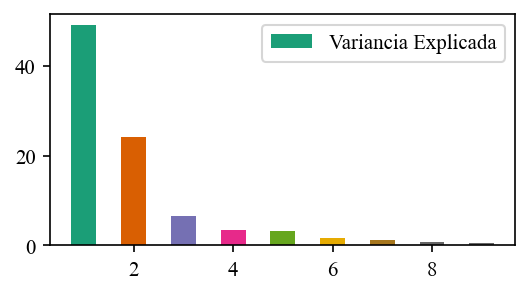

In [82]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Dark2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
ve_pc=df_variancia_explicada
x = ve_pc.index
altura = ve_pc['Variancia Explicada']
ax.bar(x=x, height=altura*100, width=0.5, color=colors, label='Variancia Explicada')
ax.legend(loc='best', fontsize=10);
plt.show()

**<font size=4 color=green>Finalmente realizamos las gráfica bi-plot del PCA, estas gráficas son la forma más important de mostra los resultados del análisis por componentes principales, se puede observar si las muestras se distribuyen de acuerdo a algún tipo de semejanza en los datos utilizados en el análisis.**

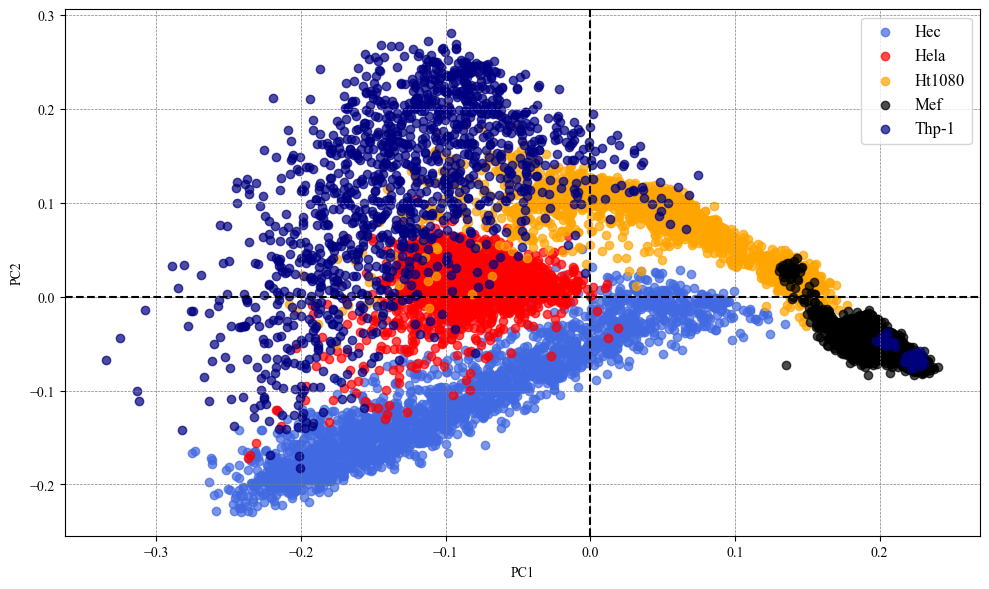

In [83]:
# Gráficas PCA
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.rcParams["font.family"] = 'Times New Roman'
colors = ['royalblue', 'red', 'orange', 'black', 'navy', 'blue', 'green', 'grey', 'yellow', 'red', 'navy', 'cian']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

for label1, label, color, marker in zip(data1['labels'].unique(), data1['labels'].unique(), colors, markers):
    points = datos_pca1[datos_pca1['labels'] == label][['PC1', 'PC2']].values
    ax1.scatter(points[:, 0], points[:, 1], color=color, marker=marker, label=label1, alpha=0.7)
    
    

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(fontsize=12)
#ax1.set_title("PCA de Cada Clase")
ax1.axvline(x = 0, color = 'k', linestyle='--', label='Average')
ax1.axhline(y = 0, color = 'k', linestyle='--', label='Average')
ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.savefig('PCA1.png', dpi=600, bbox_inches='tight')
plt.show()

**<font size=4 color=green>Detección de muestras atípicas o "*outliers*", para hacer ésto se utilizan, generalmente, dos metodologías; $T^2$ de Hotelling y *SPE/DmoX*. Aquí mostramos un ejemplo del primero, para ello definimos una función que contiene un script que realiza la deliitación de los puntos de las muestras basado en la desviación estándard.**

In [84]:
# Función para dibujar las elipse de Hotelling
from matplotlib.patches import Ellipse
def draw_hotelling_ellipse(points, ax, n_std=2.0, **kwargs):
    cov = np.cov(points, rowvar=False)
    mean = np.mean(points, axis=0)
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    theta = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigenvalues)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor=kwargs.get('edgecolor', 'black'),
                      facecolor='none', linestyle=kwargs.get('linestyle', '-'))
    ax.add_patch(ellipse)

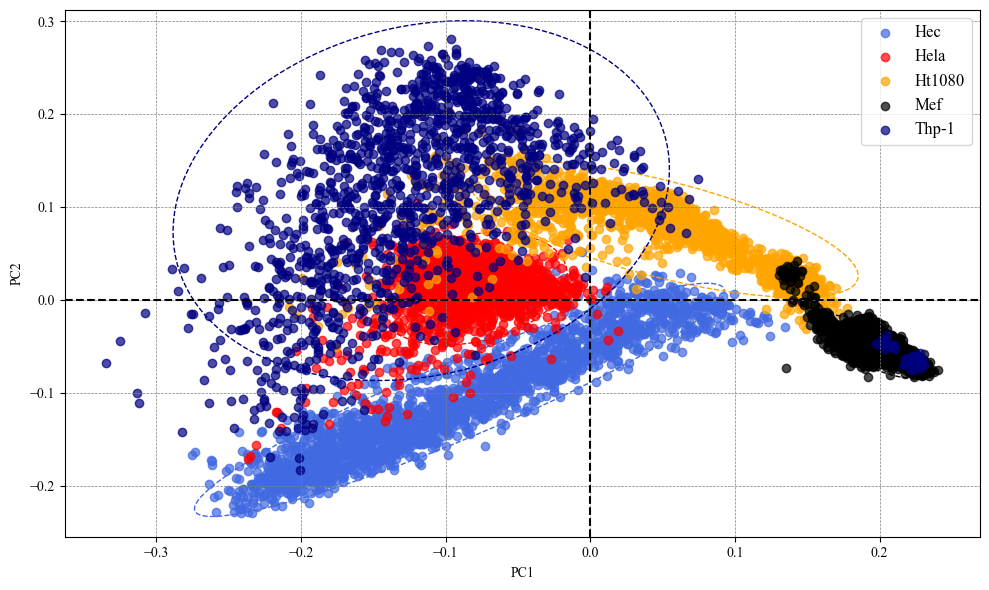

In [85]:
# Gráficas PCA
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.rcParams["font.family"] = 'Times New Roman'
colors = ['royalblue', 'red', 'orange', 'black', 'navy', 'blue', 'green', 'grey', 'yellow', 'red', 'navy', 'cian']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

for label1, label, color, marker in zip(data1['labels'].unique(), data1['labels'].unique(), colors, markers):
    points = datos_pca1[datos_pca1['labels'] == label][['PC1', 'PC2']].values
    ax1.scatter(points[:, 0], points[:, 1], color=color, marker=marker, label=label1, alpha=0.7)
    draw_hotelling_ellipse(points, ax1, edgecolor=color, linestyle='--', lw=2)
    

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(fontsize=12)
#ax1.set_title("PCA de Cada Clase")
ax1.axvline(x = 0, color = 'k', linestyle='--', label='Average')
ax1.axhline(y = 0, color = 'k', linestyle='--', label='Average')
ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.savefig('PCA1.png', dpi=600, bbox_inches='tight')
plt.show()

**<font size=4 color=green>La importancia de las variables en la clasificación de la muestras por PCA se determina con la función components_. Conocer las variables importantes permite saber cuales de estas variables determina diferencias entre los grupos de muestras, en algunos caso las variables importantes pueden ser utilizadas en otros procesos de regresión o clasificación**

In [86]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(datos_pca.shape[1])])# 📌 Establecer un umbral de carga importante (ejemplo: > 0.5)
umbral = 0.05
important_vars1 = loadings[(loadings["PC1"].abs() > umbral) & (loadings["PC2"].abs() > umbral)] # y
important_vars2 = loadings[(loadings["PC1"].abs() > umbral) | (loadings["PC2"].abs() > umbral)] # o
important_vars3 = loadings[loadings["PC1"].abs() > umbral] # Solos del PC1 debido a que este componente muestra mejor separación en INF y Empty
important_vars3.index

Index([592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605,
       606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619,
       620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
       634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647,
       648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661,
       662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 890, 891, 892, 893, 894, 895,
       896],
      dtype='int64')

**<font size=4 color=green>Podemos visualizar las cargas (loadings) para cada variable**

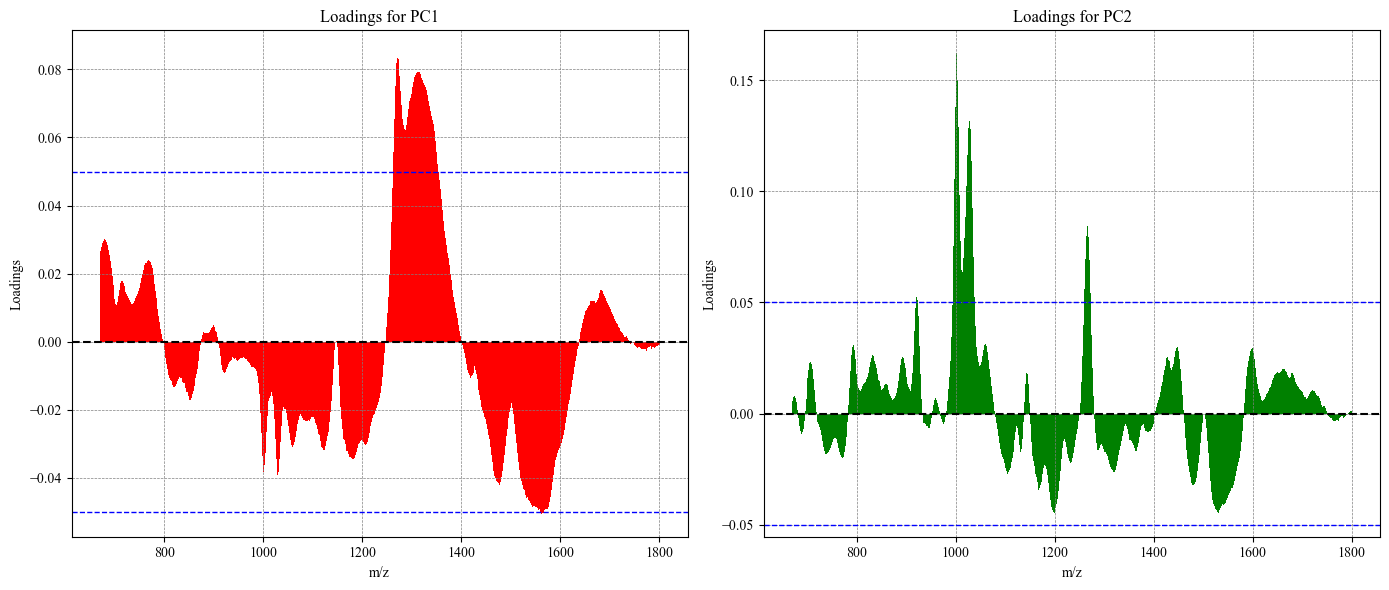

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plt.rcParams["font.family"] = 'Times New Roman'
ax1.bar(wavenumbers, loadings['PC1'], 1, color='red')
ax2.bar(wavenumbers, loadings['PC2'], 1, color='green')
ax1.axhline(y = 0, color = 'k', linestyle='--')
ax1.set_xlabel('m/z')
ax1.set_ylabel('Loadings')
#ax1.set_xlim(0, 1200)
#ax1.legend(fontsize=8)
ax1.set_title("Loadings for PC1")
ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax1.axhline(y = 0.05, color = 'b', linestyle='--', lw=1)
ax1.axhline(y = -0.05, color = 'b', linestyle='--', lw=1)
ax2.axhline(y = 0, color = 'k', linestyle='--')
ax2.axhline(y = 0.05, color = 'b', linestyle='--', lw=1)
ax2.axhline(y = -0.05, color = 'b', linestyle='--', lw=1)
ax2.set_xlabel('m/z')
ax2.set_ylabel('Loadings')
#ax2.legend(fontsize=8)
ax2.set_title("Loadings for PC2")
#ax2.set_xlim(0, 1200)
ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.savefig('Loadings.png', dpi=600, bbox_inches='tight')
plt.show()

**<font size=4 color=green>Es posible identificar las variables mas importantes para la clasificación utilizando la función *loc* de *pandas* y los indices de los loadings escogidos**

In [88]:
data_x_cor_df = pd.DataFrame(data_x_cor).T
data_x_if = data_x_cor_df.loc[important_vars3.index]
data_x_if

,0,1,2,3,4,5,6,7,8,9,...,9417,9418,9419,9420,9421,9422,9423,9424,9425,9426
592,0.084228,0.091182,0.091656,0.094323,0.092836,0.095785,0.093449,0.094342,0.094538,0.100029,...,0.074527,0.079114,0.073746,0.079512,0.088111,0.093274,0.093455,0.083231,0.096608,0.093240
593,0.088195,0.095199,0.094706,0.098377,0.097719,0.100164,0.099331,0.099696,0.100271,0.106461,...,0.076449,0.082480,0.075970,0.080994,0.091118,0.096775,0.097121,0.086393,0.100320,0.095688
594,0.091178,0.099272,0.097992,0.101449,0.101452,0.105585,0.104338,0.104618,0.105367,0.111010,...,0.078337,0.084606,0.076380,0.082438,0.092968,0.098310,0.100939,0.088049,0.102176,0.096387
595,0.093646,0.103457,0.101515,0.103943,0.104668,0.111527,0.108936,0.109292,0.110115,0.114616,...,0.080260,0.086732,0.076791,0.083884,0.094782,0.099778,0.104683,0.089706,0.104098,0.097087
596,0.096161,0.107588,0.105039,0.106438,0.107885,0.117469,0.113536,0.113907,0.114923,0.118223,...,0.081828,0.088399,0.077047,0.084997,0.096148,0.101179,0.107818,0.091073,0.105572,0.097848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0.042168,0.037380,0.033807,0.035576,0.035976,0.034757,0.037282,0.037393,0.037223,0.031146,...,0.053561,0.057019,0.054138,0.049176,0.045535,0.039778,0.036746,0.048854,0.042135,0.037362
893,0.042578,0.037666,0.033573,0.035298,0.035745,0.035229,0.036881,0.036348,0.037571,0.031315,...,0.053024,0.056820,0.054276,0.049260,0.046163,0.040532,0.037119,0.050080,0.042094,0.037994
894,0.042707,0.038507,0.033339,0.036293,0.034938,0.035297,0.036421,0.035860,0.036583,0.032593,...,0.051774,0.056302,0.054192,0.049086,0.046978,0.041218,0.037340,0.051355,0.041542,0.039169
895,0.042837,0.039349,0.033106,0.037231,0.034074,0.035365,0.035904,0.035373,0.035596,0.033927,...,0.050525,0.055785,0.054087,0.048912,0.047756,0.041905,0.037561,0.052630,0.041054,0.040345


**<font size=4 color=green>Finalmente, recuperación de los datos, para ello usamos la función *inverse_transform*.**

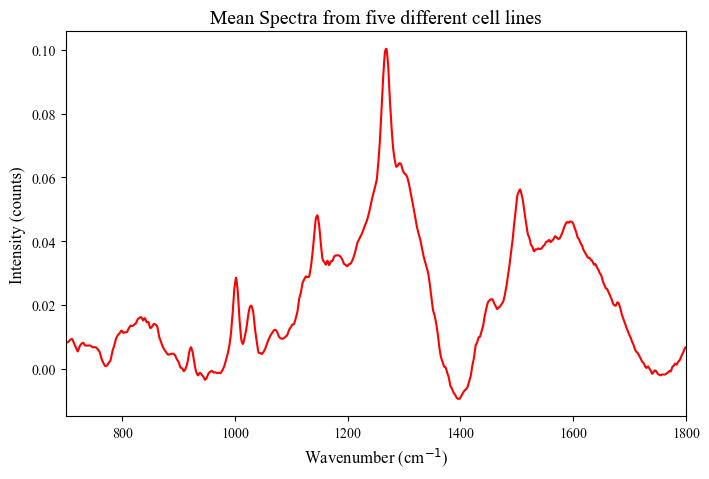

In [89]:
data_x_rec = pca.inverse_transform(datos_pca)
#pd.DataFrame(X_recovered_scaled)

fig, ax = plt.subplots(figsize=(8,5))

# Plot the media spectra on the same axis
ax.plot(wavenumbers, pd.DataFrame(data_x_rec).mean(axis=0), color='red')

# Add axis labels and legend
ax.set_xlim(700, 1800)
ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
ax.set_ylabel('Intensity (counts)', fontsize=12)
ax.set_title('Mean Spectra from five different cell lines', fontsize=14)
#ax.legend()

# Show the plot
plt.show()

In [90]:
mse = np.mean((data_x_cor - data_x_rec)**2)
print("\nError cuadrático medio de la reconstrucción:", mse)


Error cuadrático medio de la reconstrucción: 2.9903532319940034e-06


**<font size=4 color=green>t-SNE (t-Distributed Stochastic Neighbor Embedding) es un algoritmo de aprendizaje no supervisado diseñado para reducir la dimensionalidad de datos complejos, especialmente cuando se quiere representar información de alta dimensión en 2D o 3D para poder visualizarla.  Medir similitudes entre puntos en el espacio original de alta dimensión (ejemplo: vectores de 1000 características).  Construir una distribución de probabilidad que refleja qué tan probable es que dos puntos sean vecinos (cercanos).  Luego, en el espacio reducido (2D o 3D), genera otra distribución de probabilidades de vecindad.  Optimiza la posición de los puntos en baja dimensión para que las relaciones de vecindad se conserven lo mejor posible.  Mantiene bien las relaciones locales (los puntos similares permanecen cerca). No es bueno para preservar relaciones globales (distancias grandes pueden distorsionarse).  Es muy usado para visualizar embeddings, datos de texto, imágenes, genómica, datos satelitales, etc.  Tiene un hiperparámetro clave llamado perplexity, que regula el balance entre estructura local y global.**

In [91]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(np.array(data_x_cor))
ts1 = pd.DataFrame(tsne_results) # Convierte los datos pca en un DataFrame

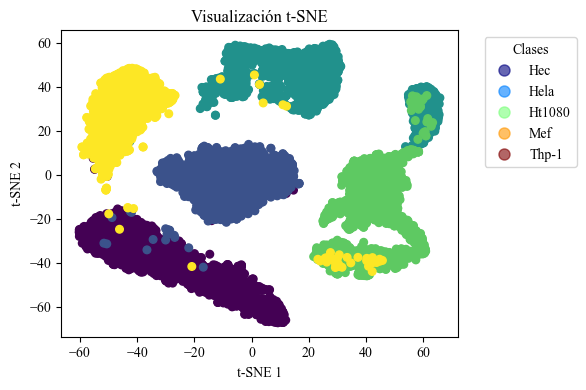

In [104]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
y = encoder.fit_transform (data1[['labels']])

fig, ax = plt.subplots(figsize=(6,4))

# tu scatter original
scatter = ax.scatter(ts1[0], ts1[1], c=y, cmap='viridis', s=30)

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_title('Visualización t-SNE')

# --- leyenda con nombres únicos ---
unique_classes, idx = np.unique(data1[['labels']], return_index=True)

# Colores según cmap (coinciden con scatter)
#cmap = plt.cm.get_cmap('jet', len(unique_classes))
handles = []
labels = []

for i, cls in enumerate(unique_classes):
    handles.append(plt.Line2D([], [], marker="o", color=cmap(i), 
                              linestyle='', markersize=8, alpha = 0.6))
    labels.append(cls)   # usa directamente el nombre de la clase

ax.legend(handles, labels, title="Clases", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

**<font size=4 color=blue>LDA (Análisis Discriminante Lineal) es una técnica de reducción de dimensionalidad supervisada y, al mismo tiempo, un clasificador lineal. Su objetivo principal es encontrar combinaciones lineales de variables que separen lo mejor posible a varias clases dentro de un conjunto de datos. Para ello Calcula la varianza intra-clase (qué tan dispersos están los datos dentro de cada clase). Calcula la varianza entre-clases (qué tan lejos están las medias de las clases entre sí). Busca proyectar los datos en un espacio de menor dimensión maximizando la separación entre clases y minimizando la dispersión interna de cada clase.
El criterio matemático es:**

$$Maximizar = \frac{|W^TS_BW|}{W^TS_WW|}$$
	
**<font size=4 color=blue>donde $S_B$ es la matriz de dispersión, $S_W$ y $W$ es la matriz de proyección**

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(np.array(data_x_cor), y.ravel())
lda = pd.DataFrame(X_lda) 

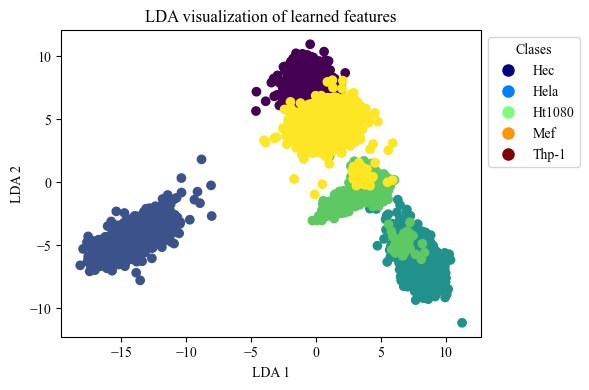

In [107]:
# Plot the t-SNE visualization
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(lda[0], lda[1], c=y, cmap='viridis')
ax.set_xlabel('LDA 1')
ax.set_ylabel('LDA 2')
plt.title('LDA visualization of learned features')
unique_classes, idx = np.unique(data1[['labels']], return_index=True)

# Colores según cmap (coinciden con scatter)
#cmap = plt.cm.get_cmap('jet', len(unique_classes))
handles = []
labels = []

for i, cls in enumerate(unique_classes):
    handles.append(plt.Line2D([], [], marker="o", color=cmap(i), 
                              linestyle='', markersize=8))
    labels.append(cls)   # usa directamente el nombre de la clase

ax.legend(handles, labels, title="Clases", bbox_to_anchor=(1.0, 1), loc="best")

plt.tight_layout()
plt.show()